In [2]:
import numpy as np

# Define matrix A
A = np.array([
    [2, -1, 0, 1],
    [-2, 0, 1, -1],
    [4, -1, 0, 1],
    [4, -3, 0, 2]
])

# Explicitly define the calculated inverse matrix A_inv
A_inv = np.array([
    [-0.5, 0, 0.5, 0],
    [2, 0, 0, -1],
    [3, 1, 0, -1],
    [4, 0, -1, -1]
])

# Compute A * A_inv to check if it is the identity matrix
identity_check = np.dot(A, A_inv)

# Print results
print("A * A_inv =")
print(identity_check)

# Check if A * A_inv is approximately the identity matrix
is_identity = np.allclose(identity_check, np.eye(4))
print("\nIs A * A_inv equal to the identity matrix? :", is_identity)


A * A_inv =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Is A * A_inv equal to the identity matrix? : True


In [4]:
# Define the coefficients for each segment of the piecewise cubic spline function
a1, b1, c1, d1 = 0.02226, 0, 0.01144, 0.01
a2, b2, c2, d2 = -0.02431, 0.02329, 0.00756, 0.01022
a3, b3, c3, d3 = -0.00965, 0.00496, 0.0152, 0.00915
a4, b4, c4, d4 = 0.02157, -0.08091, 0.09391, -0.01489

# Define the interval boundaries
x0 = 0
x1 = 2 / 12
x2 = 5 / 12
x3 = 11 / 12
x4 = 15 / 12

# Define the function to evaluate f(x) at a given point x
def evaluate_f(x):
    if x0 <= x < x1:
        return a1 * x**3 + b1 * x**2 + c1 * x + d1
    elif x1 <= x < x2:
        return a2 * x**3 + b2 * x**2 + c2 * x + d2
    elif x2 <= x < x3:
        return a3 * x**3 + b3 * x**2 + c3 * x + d3
    elif x3 <= x <= x4:
        return a4 * x**3 + b4 * x**2 + c4 * x + d4
    else:
        raise ValueError("x is outside the defined intervals")

# Test the function at specific points
test_points = [0, x1, x2, x3, x4, 13/12]
results = {point: evaluate_f(point) for point in test_points}
print(results)


{0: 0.01, 0.16666666666666666: 0.012014398148148147, 0.4166666666666667: 0.015646383101851853, 0.9166666666666666: 0.019821684027777772, 1.25: 0.018204531250000003, 1.0833333333333333: 0.019313315972222217}


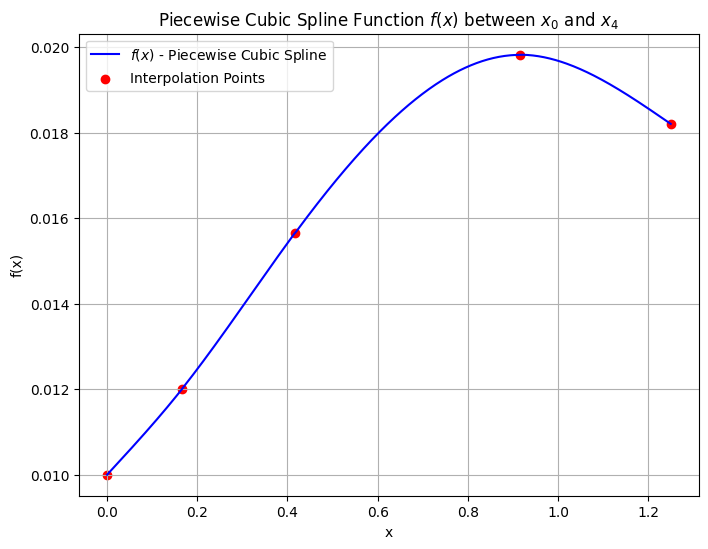

In [6]:
import matplotlib.pyplot as plt

# Generate a range of x values between x0 and x4
x_values = np.linspace(x0, x4, 500)
y_values = [evaluate_f(x) for x in x_values]

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r"$f(x)$ - Piecewise Cubic Spline", color='blue')
plt.scatter([x0, x1, x2, x3, x4], [evaluate_f(x) for x in [x0, x1, x2, x3, x4]], color='red', label="Interpolation Points")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Piecewise Cubic Spline Function $f(x)$ between $x_0$ and $x_4$")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import numpy as np
from sympy import Matrix

# Define matrix A
A = np.array([[-1, 2],
              [2, 2]])

# Define matrix S (matrix of eigenvectors)
S = np.array([[1, -2],
              [2, 1]]) / np.sqrt(5)

# Compute the inverse of S
S_inv = np.linalg.inv(S)

# Define the diagonal matrix of eigenvalues
D = np.array([[3, 0],
              [0, -2]])

# Raise the diagonal matrix to the 12th power
D_12 = np.diag([3**12, (-2)**12])

# Calculate A^12 using the similarity transformation
A_12 = S @ D_12 @ S_inv

# Convert the result to a sympy matrix for nicer LaTeX output
A_12_sympy = Matrix(A_12)

# Generate the LaTeX code for the result
latex_code = f"A^{{12}} = {A_12_sympy}"
latex_code


'A^{12} = Matrix([[109565.000000000, 210938.000000000], [210938.000000000, 425972.000000000]])'

In [3]:
import sympy as sp

# Define the variable lambda (using ASCII-friendly name)
lambda_ = sp.symbols('lambda')

# Define the matrix B
B = sp.Matrix([
    [10, -20, -32, -26],
    [18, -41, -68, -54],
    [-14, 19, 26, 23],
    [7, 1, 9, 4]
])

# Define the identity matrix I and compute lambda*I - B
I = sp.eye(4)  # 4x4 identity matrix
char_matrix = lambda_ * I - B

# Calculate the determinant of (lambda*I - B) to get the characteristic polynomial
char_poly = sp.simplify(char_matrix.det())

# Display the characteristic polynomial
char_poly

lambda**4 + lambda**3 - 3*lambda**2 - 5*lambda - 2

In [3]:
import numpy as np
from scipy.linalg import null_space

# Define the matrix B
B = np.array([[10, -20, -32, -26],
              [18, -41, -68, -54],
              [-14, 19, 26, 23],
              [7, 1, 9, 4]])

# Calculate B + I, where I is the identity matrix
I = np.eye(4)  # Create an identity matrix of size 4x4
B_plus_I = B + I

# Calculate the nullspace of B + I
nullspace_of_B_plus_I = null_space(B_plus_I)

# Display the nullspace
print("Nullspace of B + I (each column is a basis vector for the nullspace):")
print(nullspace_of_B_plus_I)

# Checking the number of linearly independent vectors (columns)
num_eigenvectors = nullspace_of_B_plus_I.shape[1]
print("Number of linearly independent eigenvectors for λ = -1:", num_eigenvectors)


Nullspace of B + I (each column is a basis vector for the nullspace):
[[-1.14652025e-13]
 [ 4.08248290e-01]
 [ 4.08248290e-01]
 [-8.16496581e-01]]
Number of linearly independent eigenvectors for λ = -1: 1


In [1]:
import sympy as sp

# Define the variable for lambda
lambda_ = sp.symbols('lambda')

# Define the matrix B
B = sp.Matrix([
    [10, -20, -32, -26],
    [18, -41, -68, -54],
    [-14, 19, 26, 23],
    [7, 1, 9, 4]
])

# Calculate the characteristic polynomial by computing the determinant of (lambda*I - B)
char_poly = (lambda_ * sp.eye(B.shape[0]) - B).det()

# Simplify the characteristic polynomial
char_poly_simplified = sp.simplify(char_poly)

# Output the characteristic polynomial
print("The characteristic polynomial of the matrix B is:")
print(char_poly_simplified)

# Alternatively, show the polynomial as a function of lambda
print("Characteristic polynomial as a function of lambda:")
print(sp.factor(char_poly_simplified))


The characteristic polynomial of the matrix B is:
lambda**4 + lambda**3 - 3*lambda**2 - 5*lambda - 2
Characteristic polynomial as a function of lambda:
(lambda - 2)*(lambda + 1)**3


In [2]:
import sympy as sp

# Define the matrix B
B = sp.Matrix([
    [10, -20, -32, -26],
    [18, -41, -68, -54],
    [-14, 19, 26, 23],
    [7, 1, 9, 4]
])

# Compute B + I where I is the identity matrix and lambda = -1
I = sp.eye(4)
B_plus_I = B + I  # Since lambda = -1, we look at B + I

# Compute the null space of B + I
nullspace = B_plus_I.nullspace()

# Determine the number of linearly independent vectors
num_independent_vectors = len(nullspace)

# Output the result
print("Number of linearly independent eigenvectors for lambda = -1:", num_independent_vectors)
print("Basis for the eigenspace corresponding to lambda = -1:")
for vector in nullspace:
    print(vector)



Number of linearly independent eigenvectors for lambda = -1: 1
Basis for the eigenspace corresponding to lambda = -1:
Matrix([[0], [-1/2], [-1/2], [1]])
